<div style='background-color: orange'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align: center'>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#q1'>Question 1</a></li>
<li><a href='#q2'>Question 2</a></li>
<li><a href='#bonus'>Bonus</a></li>

<div style='background-color: orange'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align: center'>
        Imports
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

In [36]:
# Vectorization & Dataframe
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from scipy import stats

# Scaling (sklearn)
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# .py files
import wrangle as w

<div style='background-color: orange'>
<a id='q1'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 1
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

### 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

- Does logerror differ by location
- Does logerror differ by rooms
- Does logerror differ by room types
- Does logerror differ by home area
- Does logerror differ by lot area

In [12]:
train, validate, test = w.wrangle_zillow()
train.sample()

train.shape:(29365, 19)
validate.shape:(12586, 19)
test.shape:(10488, 19)


,parcelid,logerror,maxtransactiondate,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertylandusedesc
54450,14239086,0.002677,2017-07-06,1.5,2.0,1167.0,6059.0,1.0,33783200.0,-117874000.0,932.0,5.0,1977.0,86638.0,345185.0,2016.0,258547.0,3840.82,Single Family Residential


<div style='background-color: orange'>
<a id='q2'></a>
    <b><u><i><h1 style='text-align: center'>
        Question 2
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

### 2. Answer those questions through a mix of statistical tests and visualizations.

In [23]:
fuckit_cols = [
    'parcelid',
    'calculatedfinishedsquarefeet',
    'latitude',
    'longitude',
    'lotsizesquarefeet',
    'structuretaxvaluedollarcnt',
    'taxvaluedollarcnt',
    'landtaxvaluedollarcnt',
    'taxamount',
    'bathroomcnt',
    'bedroomcnt',
    'fips',
    'fullbathcnt',
    'roomcnt',
    'yearbuilt'
]

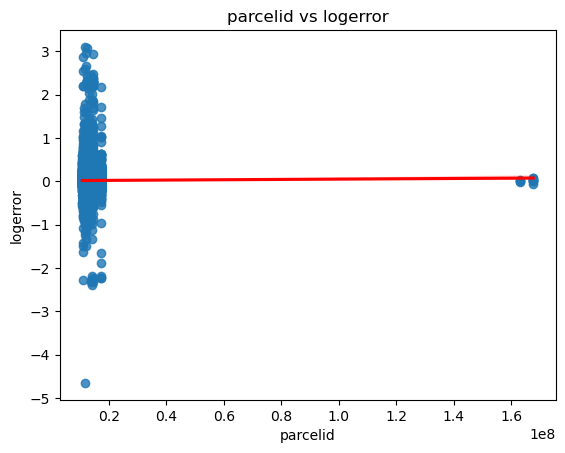

REJECT NULL HYPOTHESIS!
Feature: parcelid
Correlation: 0.0333
P-Value: 0.0000


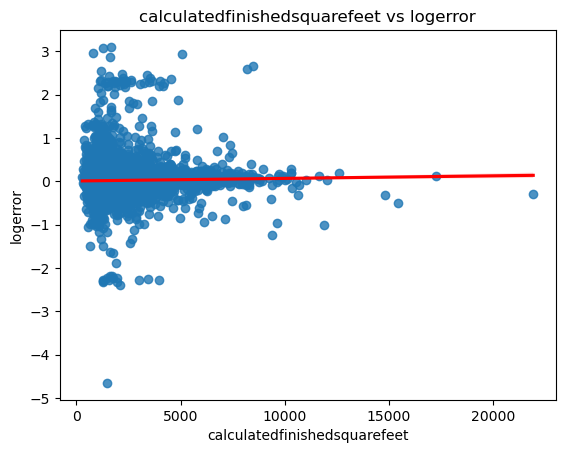

REJECT NULL HYPOTHESIS!
Feature: calculatedfinishedsquarefeet
Correlation: 0.0832
P-Value: 0.0000


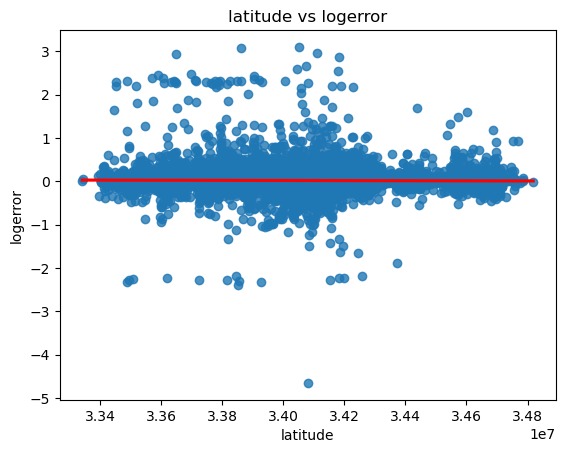

REJECT NULL HYPOTHESIS!
Feature: latitude
Correlation: -0.0279
P-Value: 0.0000


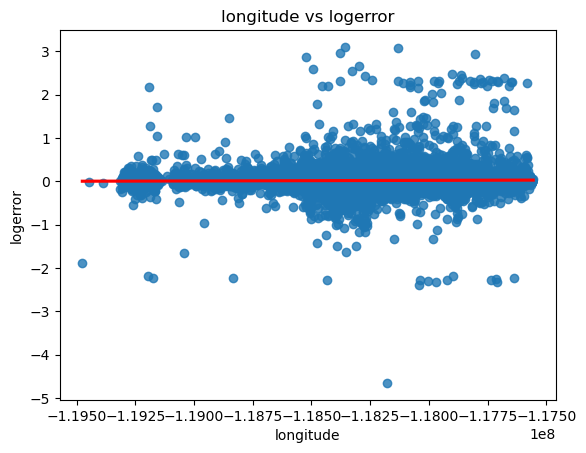

REJECT NULL HYPOTHESIS!
Feature: longitude
Correlation: 0.0248
P-Value: 0.0000


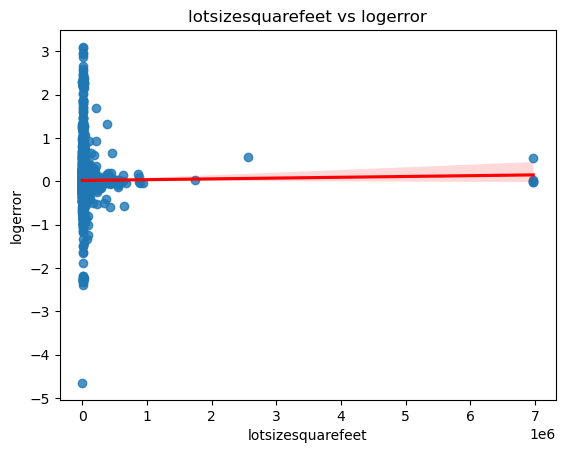

REJECT NULL HYPOTHESIS!
Feature: lotsizesquarefeet
Correlation: 0.0265
P-Value: 0.0000


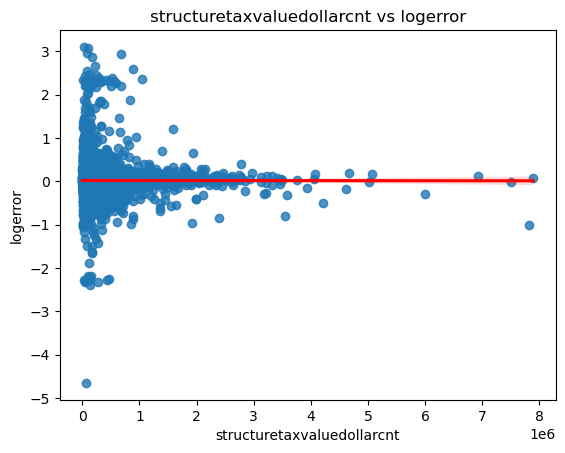

REJECT NULL HYPOTHESIS!
Feature: structuretaxvaluedollarcnt
Correlation: 0.0282
P-Value: 0.0000


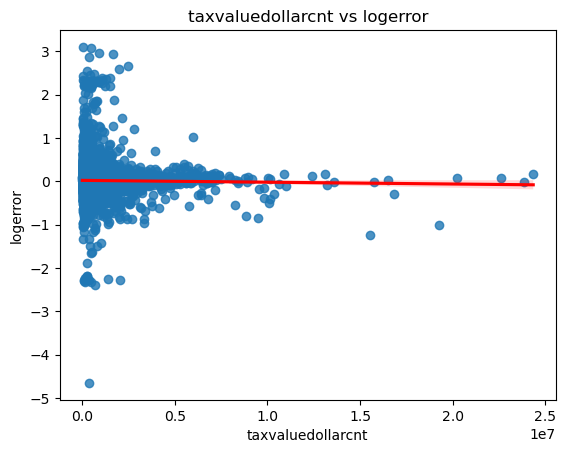

REJECT NULL HYPOTHESIS!
Feature: taxvaluedollarcnt
Correlation: 0.0208
P-Value: 0.0004


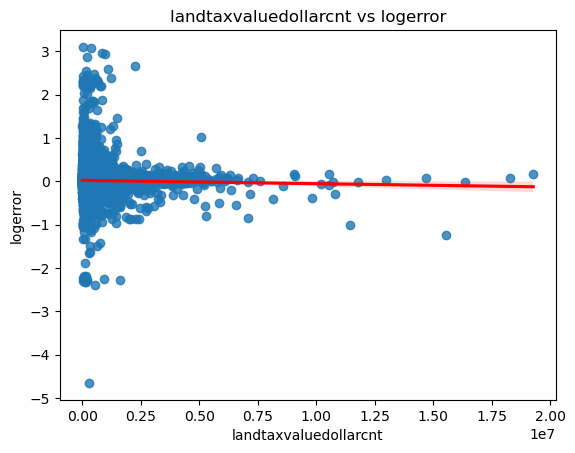

REJECT NULL HYPOTHESIS!
Feature: landtaxvaluedollarcnt
Correlation: 0.0129
P-Value: 0.0271


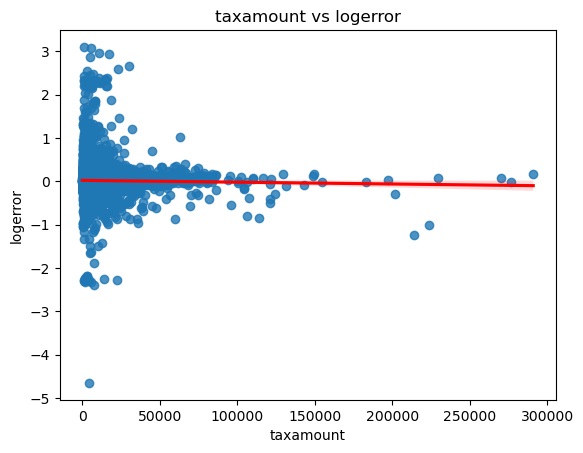

REJECT NULL HYPOTHESIS!
Feature: taxamount
Correlation: 0.0168
P-Value: 0.0039


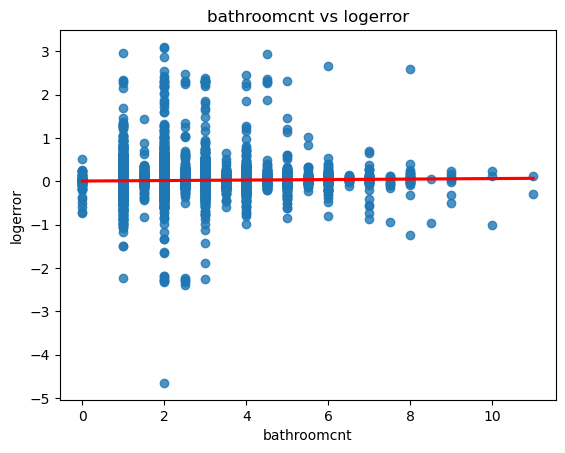

REJECT NULL HYPOTHESIS!
Feature: bathroomcnt
Correlation: 0.0749
P-Value: 0.0000


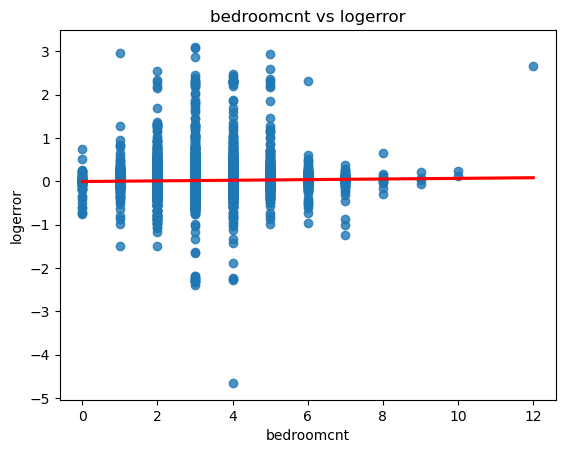

REJECT NULL HYPOTHESIS!
Feature: bedroomcnt
Correlation: 0.0668
P-Value: 0.0000


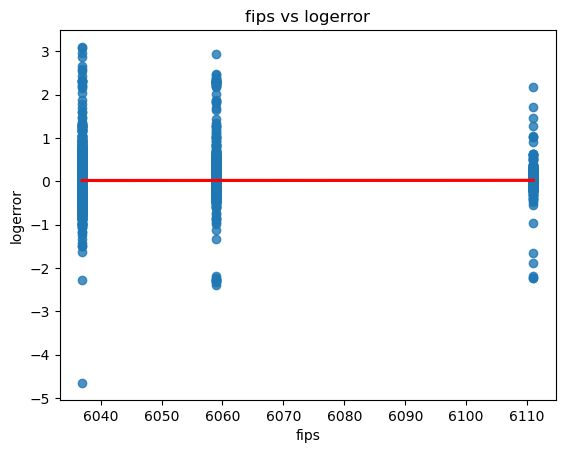

REJECT NULL HYPOTHESIS!
Feature: fips
Correlation: 0.0284
P-Value: 0.0000


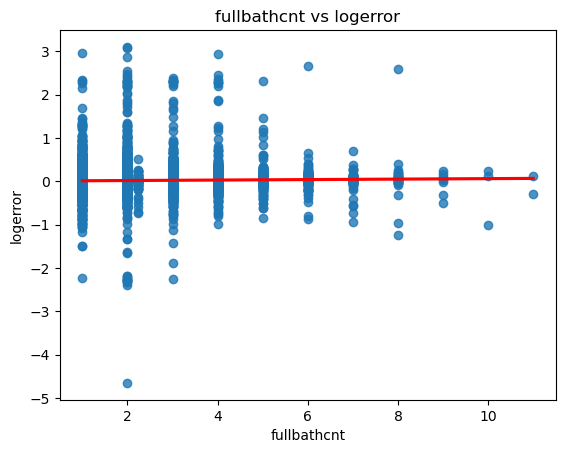

REJECT NULL HYPOTHESIS!
Feature: fullbathcnt
Correlation: 0.0715
P-Value: 0.0000


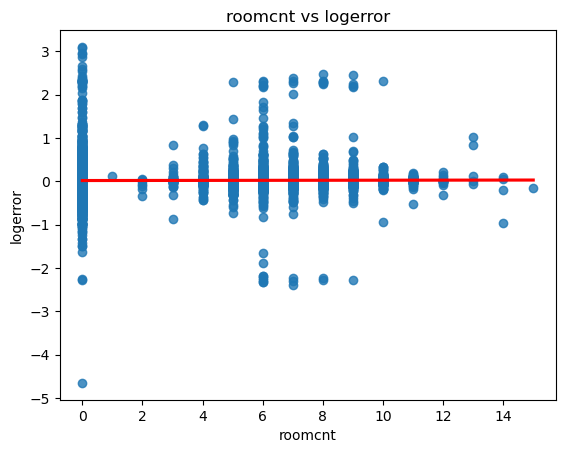

REJECT NULL HYPOTHESIS!
Feature: roomcnt
Correlation: 0.0192
P-Value: 0.0010


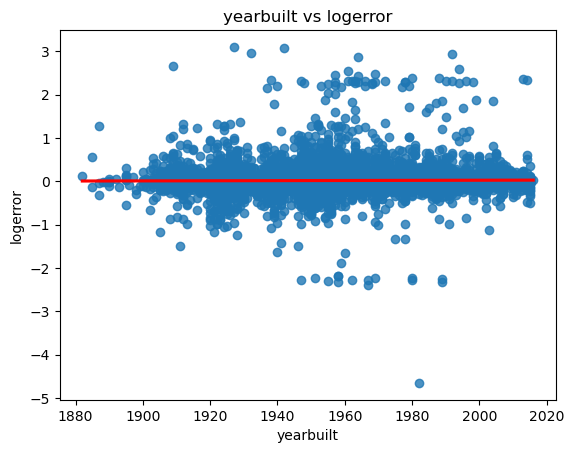

REJECT NULL HYPOTHESIS!
Feature: yearbuilt
Correlation: 0.0505
P-Value: 0.0000


In [47]:
for col in fuckit_cols:
    sns.regplot(data=train, x=col, y='logerror', line_kws={'color':'red'})
    plt.title(f'{col} vs logerror')
    plt.show()
    r, p = stats.spearmanr(train[col], train.logerror)
    alpha = 0.05
    if p < alpha:
        print(f'\033[32mREJECT NULL HYPOTHESIS!\033[0m')
        print(f'\033[35mFeature:\033[0m {col}')
        print(f'\033[35mCorrelation:\033[0m {r:.4f}')
        print(f'\033[35mP-Value:\033[0m {p:.4f}')
    else:
        print(f'\033[31mACCEPT NULL HYPOTHESIS!\033[0m')
        print(f'\033[35mFeature:\033[0m {col}')
        print(f'\033[35mCorrelation:\033[0m {r:.4f}')
        print(f'\033[35mP-Value:\033[0m {p:.4f}')

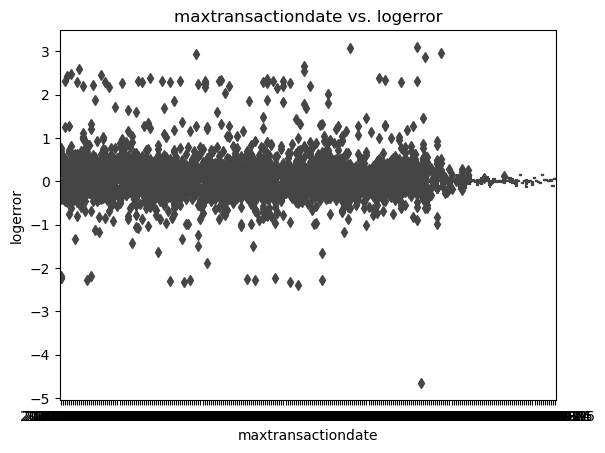

In [49]:
sns.boxplot(data=train, x='maxtransactiondate', y='logerror')
plt.title('maxtransactiondate vs. logerror')
plt.show()

- Trends for lower logerror (Visuals)
    - Does logerror differ by location
        - Latitude is higher
        - Longitude is lower
        - fips == 6111
    - Does logerror differ by rooms
        - bathrooms > 6 OR == 0
        - bedrooms > 6 OR == 0
        - fullbathrooms > 6
        - roomcnt 1-4 OR 10+
    - Does logerror differ by room types
        - Not necessarily
    - Does logerror differ by home area
        - home sqft is higher
    - Does logerror differ by lot area
        - lot sqft is higher

<div style='background-color: orange'>
<a id='bonus'></a>
    <b><u><i><h1 style='text-align: center'>
        Bonus
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>

### Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.